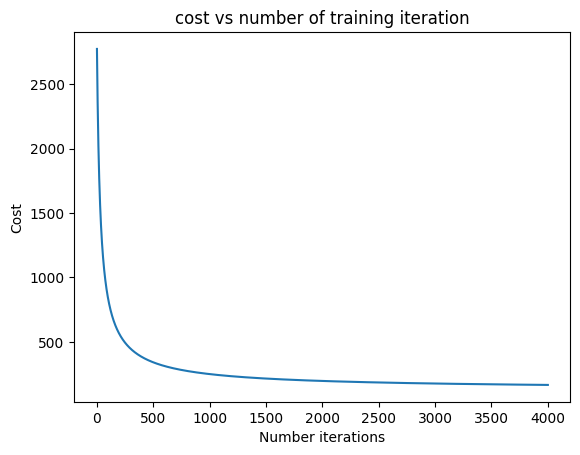

Validation Accuracy is 99.3


In [95]:
#Q3.2
import scipy
import numpy as np
import math
import matplotlib.pyplot as plt
data = scipy.io.loadmat('data.mat')

label = data['y']
data = data['X']
mean = np.mean(data, axis=0)
std = np.std(data, axis=0)


for i in range(data.shape[0]):
    data[i] = (data[i] - mean) / std


np.random.seed(10)
data = np.append(data, np.ones((data.shape[0], 1)), axis=1)

random_index = np.random.permutation(5000)
train_data = data[random_index[1000:]]
train_label = label[random_index[1000:]]
feature_size = 12
validate_data = data[random_index[:1000]]
validate_label = label[random_index[:1000]]


def logistic(X, w):
    S = []
    for x_i in X:
        S.append( 1 / (1 + math.e ** (- np.dot(x_i, w))))
    return np.array(S)

w = np.zeros((feature_size + 1, 1))
s = logistic(train_data, w)


def cost_fn(y, s, w, regulator_param):
    sum_val = 0 
    for i in range(s.size):
        if s[i] != 0 and s[i] != 1:
            sum_val += (-y[i] * np.log(s[i])) - (1 - y[i]).dot(np.log(1 - s[i]))
    return sum_val + (regulator_param / 2) * np.sum(np.square(w))

regulator_param  = 0.1
learn_rate = 0.00001

def gradient_train(X, y, s, w, num_iter):
    cost_lst = []
    iter_lst = []
    cost_lst.append(cost_fn(y, s, w, regulator_param))
    iter_lst.append(0)
    for i in range(num_iter):
        w = w - learn_rate * (np.dot(X.T, (s - y)) + regulator_param * w)
        s = logistic(train_data, w)
        cost = cost_fn(y, s, w, regulator_param) 
        cost_lst.append(cost)
        iter_lst.append(i + 1)
        
    return [cost_lst, iter_lst, w]

cost_lst, iter_lst, w_batch = gradient_train(train_data, train_label, s, w, 4000)
plt.plot(iter_lst, cost_lst)
plt.xlabel('Number iterations')
plt.ylabel('Cost')
plt.title('cost vs number of training iteration')
plt.show()


s = logistic(validate_data,  w_batch)
diff = np.rint(s) - validate_label
accuracy_rate = (np.true_divide(diff.size - np.count_nonzero(diff), validate_data.shape[0])) * 100
print(f"Validation Accuracy is {accuracy_rate}")




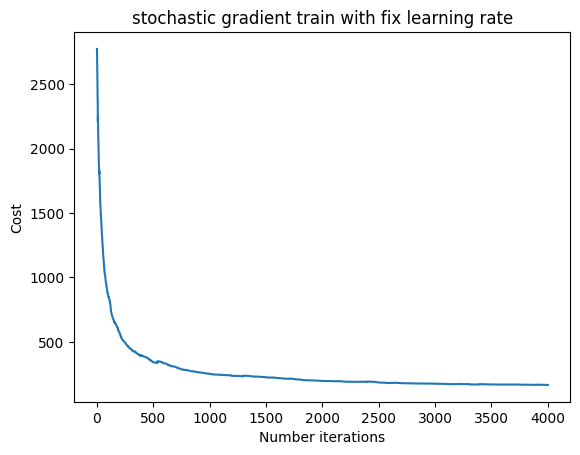

Validation Accuracy is 99.2


In [96]:
#Q3.4
learn_rate = 0.00001
def stochastic_gradient_train(X, y, s, w, num_iter):
    cost_lst = []
    iter_lst = []
    cost_lst.append(cost_fn(y, s, w, regulator_param))
    iter_lst.append(0)
    for i in range(num_iter):
        index = np.random.randint(X.shape[0])
        w = w - (((s[index]- y[index])[0] * X.shape[0] * X[index]).reshape((13, 1)) + regulator_param * w) * learn_rate
        s = logistic(train_data, w)
        cost = cost_fn(y, s, w, regulator_param) 
        cost_lst.append(cost)
        iter_lst.append(i + 1)
    return [cost_lst, iter_lst, w]


w = np.zeros((feature_size + 1, 1))
s = logistic(train_data, w)
cost_lst_fix, iter_lst, w = stochastic_gradient_train(train_data, train_label, s, w, 4000)
plt.plot(iter_lst, cost_lst_fix)
plt.xlabel('Number iterations')
plt.ylabel('Cost')
plt.title('stochastic gradient train with fix learning rate')
plt.show()


s = logistic(validate_data, w)
diff = np.rint(s) - validate_label
accuracy_rate = (np.true_divide(diff.size - np.count_nonzero(diff), validate_data.shape[0])) * 100
print(f"Validation Accuracy is {accuracy_rate}")

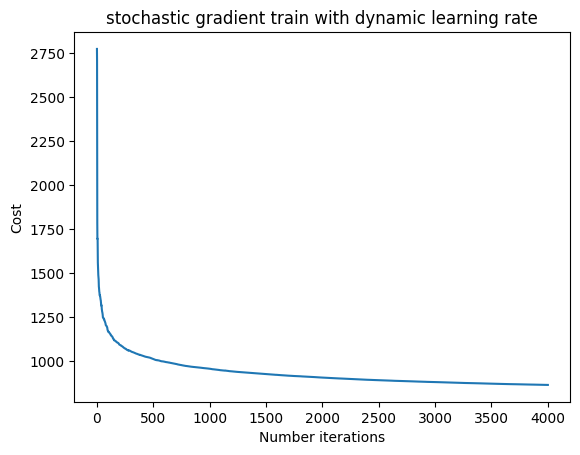

Validation Accuracy is 97.0


In [97]:
#Q3.5
learn_rate = 0.0001
def stochastic_dynamic_step_gradient_train(X, y, s, w, num_iter):
    cost_lst = []
    iter_lst = []
    cost_lst.append(cost_fn(y, s, w, regulator_param))
    iter_lst.append(0)
    for i in range(num_iter):
        index = np.random.randint(X.shape[0])
        w = w - (((s[index]- y[index])[0] * X.shape[0] * X[index]).reshape((13, 1)) + regulator_param * w) * (learn_rate/(i+ 1))
        s = logistic(train_data, w)
        cost = cost_fn(y, s, w, regulator_param) 
        cost_lst.append(cost)
        iter_lst.append(i + 1)
    return [cost_lst, iter_lst, w]


w = np.zeros((feature_size + 1, 1))
s = logistic(train_data, w)
cost_lst_dynamic, iter_lst, w = stochastic_dynamic_step_gradient_train(train_data, train_label, s, w, 4000)
plt.plot(iter_lst, cost_lst_dynamic)
plt.xlabel('Number iterations')
plt.ylabel('Cost')
plt.title('stochastic gradient train with dynamic learning rate')
plt.show()


s = logistic(validate_data, w)
diff = np.rint(s) - validate_label
accuracy_rate = (np.true_divide(diff.size - np.count_nonzero(diff), validate_data.shape[0])) * 100
print(f"Validation Accuracy is {accuracy_rate}")

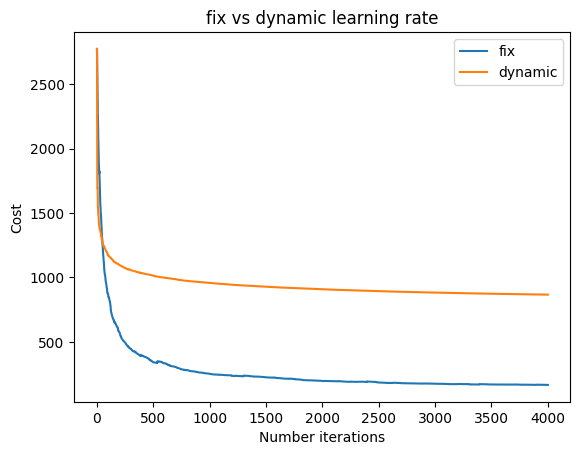

In [98]:
plt.plot(iter_lst, cost_lst_fix, label='fix')
plt.plot(iter_lst, cost_lst_dynamic, label='dynamic')
plt.xlabel('Number iterations')
plt.ylabel('Cost')
plt.title('fix vs dynamic learning rate')
plt.legend()
plt.show()

In [99]:
#Q3.6
import os
import csv

data = scipy.io.loadmat('data.mat')
test_data = data['X_test']
test_mean = np.mean(test_data, axis=0)
test_std = np.std(test_data, axis=0)
for i in range(test_data.shape[0]):
    test_data[i] = (test_data[i] - test_mean) / std

test_data = np.append(test_data, np.ones((test_data.shape[0], 1)), axis=1)
test_s = np.rint(logistic(test_data,  w_batch).flatten()).astype(int)

data = [{"Id": i+1, "Category": label} for i, label in enumerate(test_s)]
csv_file_path = os.path.join(os.path.split(os.getcwd())[0], "wine.csv")

fields = ["Id", "Category"]

# Writing to CSV file
with open(csv_file_path, mode='w', newline='') as file:
    writer = csv.DictWriter(file, fieldnames=fields)

    # Write the header
    writer.writeheader()

    # Write the data
    writer.writerows(data)

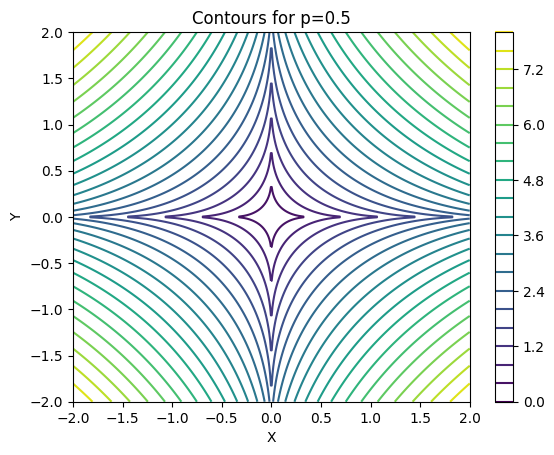

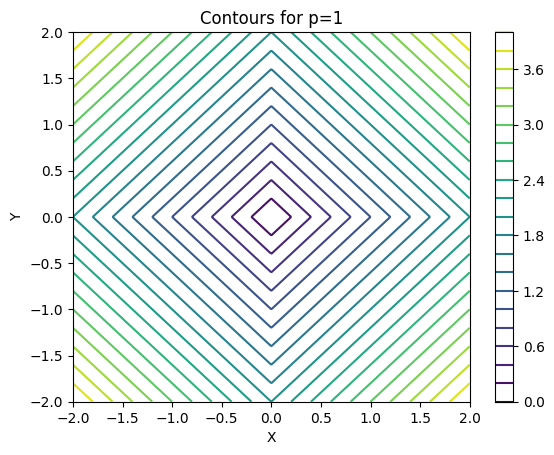

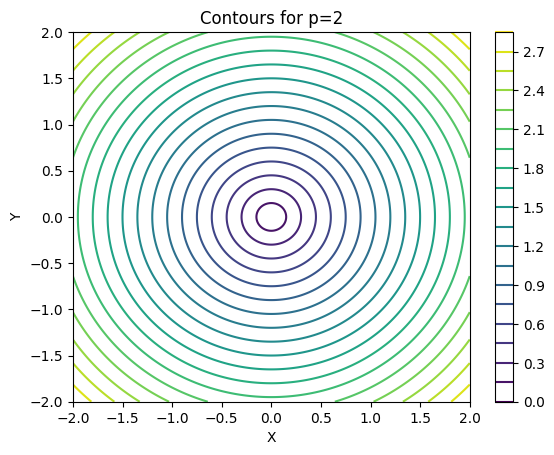

In [66]:
#Q5
import numpy as np
import matplotlib.pyplot as plt

def lp_norm(X, Y, p):
    return (np.abs(X)**p + np.abs(Y)**p)**(1/p)


x = np.linspace(-2, 2, 500)
y = np.linspace(-2, 2, 500)
X, Y = np.meshgrid(x, y)


for p_value in [0.5, 1, 2]:
    Z = lp_norm(X, Y, p_value)
    plt.contour(X, Y, Z, levels=20)  
    plt.title(f'Contours for p={p_value}')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.colorbar()
    plt.show()